In [1]:
import simplejson as json
with open('../../external_data/google_place/total_place.json','r') as f_in:
    data = json.loads(f_in.readline())

# Google place - The open-access ultimate external data

In [2]:
data[1]

{'html_attributions': [],
 'next_page_token': 'CrQCJgEAALogR0B5thMR7GFGZhvtySeyfabEmI3umRFoUks4kH0l5aioxFwVxQUO5wQqbUjJqTtokD3SZOtGTQ43zq-50j12FtfvGlJ_dQ_o-k_J2YtJhMKwtFqfa1iYA6BH1Mi60GdPr4zIMVt-o5jIMTFbTX0s_qUTWk0HlE0yGw3bL8EhAsSVPRzLl-OkiOrCWg31WB6Lgd9qplsHSPrg8AsPRbFYHF5lXVlE54la3ACwOnCh-j6OJxf0Xd5oVQYk1MnYLH3nzHLzUe2xCB9p3aR30nuSLXkJod56vfA9AKBdA8k-LpAGuhmoaSbnirSz9Oq9RiCGBQN9VvbkJm3HmBeyKra8hvVqswsbznQfnb0MgHa1B8RV4rRUpAfe-1iSLlnVbe20jBuApsAbLPTBAxhfegMSEL_CYeP1-5D8AOXBPcE9ud0aFDAtVET-cfMwC0YLHXMnXX4UsY6-',
 'results': [{'geometry': {'location': {'lat': 34.6703624,
     'lng': -86.0185903}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/school-71.png',
   'id': '6bb31d338f225a408c803f7f48cf2cb2f8639d8b',
   'name': 'Brownwood Elementary School',
   'place_id': 'ChIJu9ZGLNHuYYgRFKDDc9BTZ_4',
   'reference': 'CnRvAAAASiXQ7y7ux3F-xKTnDKRT8nZ6vrERq4lworoKBwAYo9SnTtk6XiJIN2mcdPezD10spamk0sagCIzK1urA1FPfUv9sSK4ZyT5LmH3Cz2iml40Z5FG7bTGF1jMrcZQyueoWPphvwYFGoJJuUT29zhf4IBIQ

In [3]:
def clean_type(type_lst):
    for bored_keyword in [ 'point_of_interest', 'establishment']:
        if bored_keyword in type_lst:
            type_lst.remove(bored_keyword)
    return type_lst
def extract_places(loc):
    place_lst = []
    for place in loc['results']:
        dic = {}
        dic['lat'] = place['geometry']['location']['lat']
        dic['lng'] = place['geometry']['location']['lng']
        dic['name'] = place['name']
        dic['types'] = clean_type(place['types'])
        place_lst.append(dic)
    return place_lst

## Cleaning the data

In [4]:
# this is a heavy computation cleaning step
cleaned_data = [extract_places(record) for record in data]

In [6]:
largest_record_len = max([len(i) for i in cleaned_data])
print (largest_record_len)


20


In [7]:
# cleaned_data[3000]
import pandas as pd
acc_df = pd.read_csv("../../data/train/accident_train.csv")

In [8]:
acc_df.columns

Index(['ID', 'STATE', 'VE_FORMS', 'PEDS', 'PERSONS', 'COUNTY', 'CITY', 'YEAR',
       'DAY', 'MONTH', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'ROAD_FNC',
       'ROUTE', 'TWAY_ID', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR',
       'HARM_EV', 'MAN_COLL', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS',
       'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR',
       'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR'],
      dtype='object')

In [9]:
acc_df.loc[0]["LATITUDE"]

32.992777777800001

In [12]:
import geopy
from geopy.distance import great_circle
# from math import atan2, sqrt, sin, cos
# def dist_calc(lon1, lon2, lat1, lat2):
#     # in units of mile
#     dlon = abs(lon2 - lon1) * np.pi / 180
#     dlat = abs(lat2 - lat1) * np.pi / 180
#     a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2 
#     c = 2 * atan2( sqrt(a), sqrt(1-a) ) 
#     d = 3959 * c
#     return d

In [54]:
import numpy as np
N = len(cleaned_data)
school_cnt = np.zeros(N)
univ_cnt = np.zeros(N)
bar_cnt = np.zeros(N)
liq_cnt = np.zeros(N)
dist_google = np.zeros((N,20))
i = 0
for acc in cleaned_data:
    j = 0
    acc_loc = (acc_df.loc[i]["LATITUDE"], acc_df.loc[i]["LONGITUD"])
    for place in acc:
        school_cnt[i] += "school" in place['types']
        univ_cnt[i] += "university" in place['types']
        bar_cnt[i] += "bar" in place['types']
        liq_cnt[i] += "liquor_store" in place['types']
        place_loc = (place['lat'], place['lng'] )
        if "bar" in place['types'] or "liquor_store" in place['types']:
            dist_google[i,j] = great_circle(acc_loc, place_loc).miles
            j += 1
    i += 1
    
df_google = pd.DataFrame({"school_cnt":school_cnt, "bar_cnt":bar_cnt, "univ_cnt":univ_cnt, "liq_cnt":liq_cnt})
# dist_google

In [55]:
df_google['drunk'] = acc_df['DRUNK_DR']

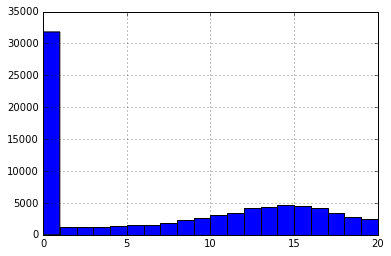

In [115]:
% matplotlib inline
drunk_df_google = df_google[df_google['drunk']]
nondrunk_df_google = df_google[~df_google['drunk']]

# drunk_df_google['bar_cnt'].hist()
# nondrunk_df_google['bar_cnt'].hist()


drunk_df_google['school_cnt'].hist(bins=20)
# nondrunk_df_google['school_cnt'].hist(bins=100)



# df_google['bar_cnt'].hist()
# df_google['school_cnt'].hist()
# df_google['bar_cnt'].hist()
# df_google['univ_cnt'].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x22689d128>]], dtype=object)

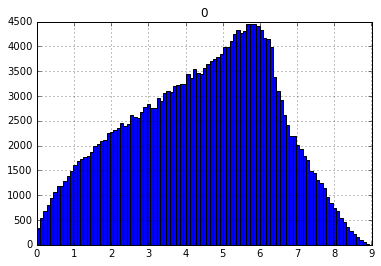

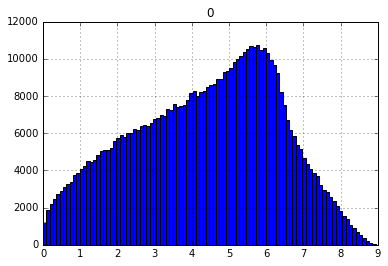

In [109]:
if_drunk = np.array(df_google['drunk'])

drunk_dist = np.reshape(dist_google[if_drunk,],-1)
drunk_dist = drunk_dist[np.nonzero(drunk_dist)]

nondrunk_dist = np.reshape(dist_google[~if_drunk,],-1)
nondrunk_dist = nondrunk_dist[np.nonzero(nondrunk_dist)]

pd.DataFrame(drunk_dist).hist(bins=100)
pd.DataFrame(nondrunk_dist).hist(bins=100)